In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def Vsualize(column_name,data):

    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(9,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()
path = '/content/Unemployment in India.csv' # Corrected file path
data = pd.read_csv(path)
data.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
509,Jammu & Kashmir,31-05-2019,Monthly,23.04,1130139.0,46.74,Urban
397,Assam,31-03-2020,Monthly,10.34,1664145.0,45.03,Urban
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,Uttar Pradesh,31-01-2020,Monthly,6.06,45777509.0,39.67,Rural
355,West Bengal,31-03-2020,Monthly,7.02,25097812.0,49.18,Rural
708,Tripura,31-03-2020,Monthly,25.69,450271.0,63.56,Urban
699,Tripura,30-06-2019,Monthly,25.59,408738.0,58.80,Urban
514,Jammu & Kashmir,31-12-2019,Monthly,7.02,1209085.0,40.71,Urban
421,Chandigarh,30-11-2019,Monthly,22.05,289593.0,38.60,Urban
51,Chhattisgarh,30-04-2020,Monthly,0.00,6534321.0,39.43,Rural


In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'car data.csv', 'Unemployment in India.csv', 'sample_data']


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data['Date'] = pd.to_datetime(data[' Date'])
data.drop(' Date',axis = 1,inplace = True)
data['Date'].head()

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30


In [ ]:
data.isnull().sum()
data.duplicated().sum()

np.int64(27)

In [ ]:
data.nunique()

,0
Region,28
Frequency,2
Estimated Unemployment Rate (%),624
Estimated Employed,740
Estimated Labour Participation Rate (%),626
Area,2
Date,14


In [ ]:
object_data =data.select_dtypes(include = 'object')
object_data

,Region,Frequency,Area
0,Andhra Pradesh,Monthly,Rural
1,Andhra Pradesh,Monthly,Rural
2,Andhra Pradesh,Monthly,Rural
3,Andhra Pradesh,Monthly,Rural
4,Andhra Pradesh,Monthly,Rural
...,...,...,...
763,NaN,NaN,NaN
764,NaN,NaN,NaN
765,NaN,NaN,NaN
766,NaN,NaN,NaN


              Region  count
0     Andhra Pradesh     28
1              Bihar     28
2       Chhattisgarh     28
3              Delhi     28
4          Karnataka     28
5            Gujarat     28
6            Haryana     28
7   Himachal Pradesh     28
8          Jharkhand     28
9        Maharashtra     28
10    Madhya Pradesh     28
11            Kerala     28
12       West Bengal     28
13     Uttar Pradesh     28
14           Tripura     28
15            Odisha     28
16         Rajasthan     28
17            Punjab     28
18         Telangana     28
19        Tamil Nadu     28
20       Uttarakhand     27
21         Meghalaya     27
22             Assam     26
23        Puducherry     26
24               Goa     24
25   Jammu & Kashmir     21
26            Sikkim     17
27        Chandigarh     12


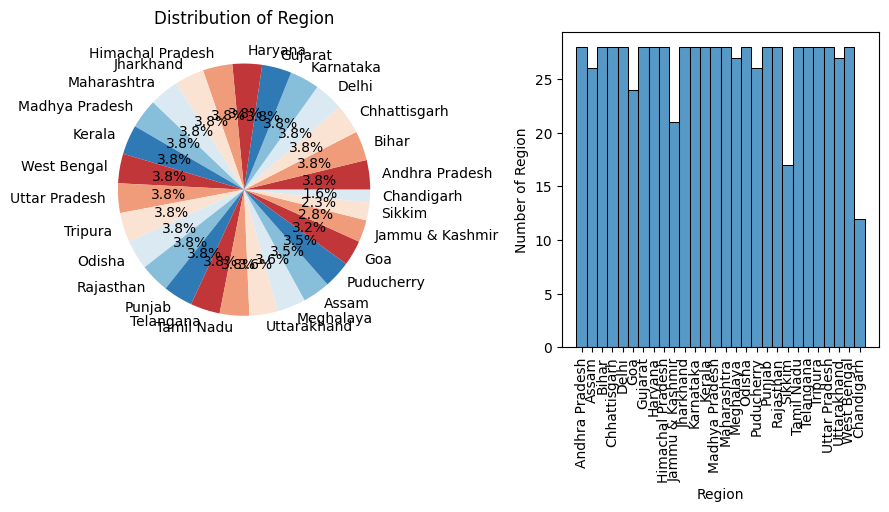

   Frequency  count
0    Monthly    381
1    Monthly    359


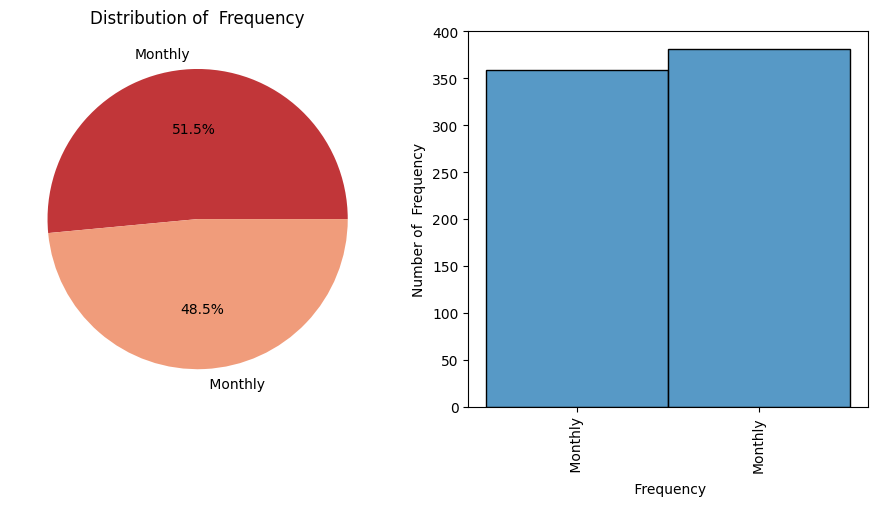

    Area  count
0  Urban    381
1  Rural    359


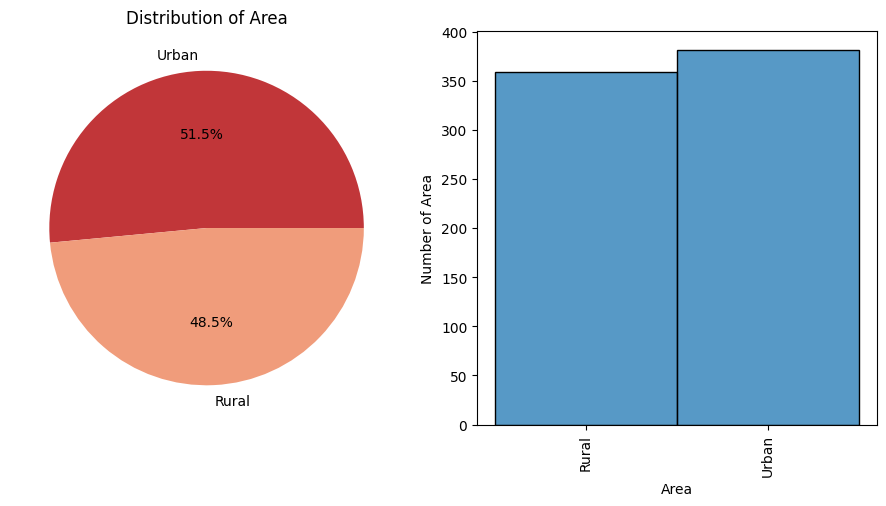

In [ ]:
for column in object_data.columns:
    print(data[column].value_counts().reset_index())
    Vsualize(column ,data)

In [ ]:
numeric_data =data.select_dtypes(exclude = 'object')
numeric_data

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
0,3.65,11999139.0,43.24,2019-05-31
1,3.05,11755881.0,42.05,2019-06-30
2,3.75,12086707.0,43.50,2019-07-31
3,3.32,12285693.0,43.97,2019-08-31
4,5.17,12256762.0,44.68,2019-09-30
...,...,...,...,...
763,NaN,NaN,NaN,NaT
764,NaN,NaN,NaN,NaT
765,NaN,NaN,NaN,NaT
766,NaN,NaN,NaN,NaT


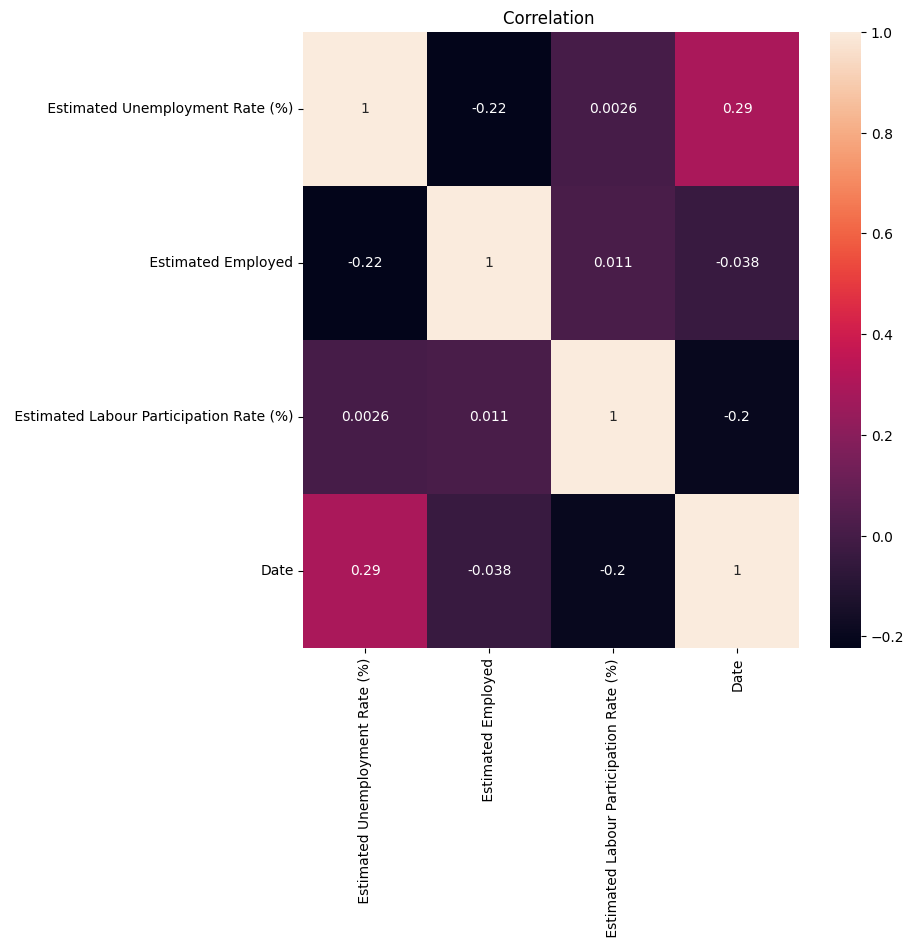

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation ")
plt.show()

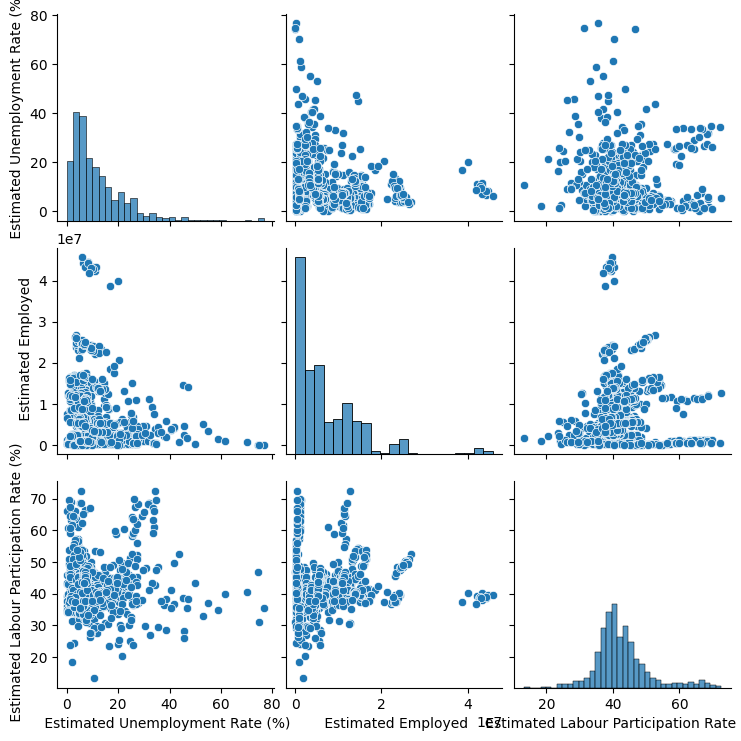

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['Region', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

In [ ]:
data.groupby('Region')[[' Frequency', ' Estimated Unemployment Rate (%)','Date']].value_counts().reset_index()

,Region,Frequency,Estimated Unemployment Rate (%),Date,count
0,Andhra Pradesh,Monthly,0.85,2020-06-30,1
1,Andhra Pradesh,Monthly,3.05,2019-06-30,1
2,Andhra Pradesh,Monthly,3.32,2019-08-31,1
3,Andhra Pradesh,Monthly,3.52,2019-10-31,1
4,Andhra Pradesh,Monthly,3.65,2019-05-31,1
...,...,...,...,...,...
735,West Bengal,Monthly,7.83,2019-10-31,1
736,West Bengal,Monthly,7.91,2019-07-31,1
737,West Bengal,Monthly,9.86,2020-06-30,1
738,West Bengal,Monthly,15.22,2020-05-31,1
